## **Building a Neural network to predict the next word given a part of sentence**

Importing important libraries for this Neural Network

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle



Uploading the text file to make our prediction model

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving The Adventures of Sherlock Holmes.txt to The Adventures of Sherlock Holmes.txt


Loading and preprocessing of the dataset

In [4]:
file = open('The Adventures of Sherlock Holmes.txt', 'r', encoding = 'utf8')

Storing the file in a list and converting the list into string

In [5]:
lines = []

In [6]:

for line in file:
  lines.append(line)

# Converting list into string
dataset = ''
for line in lines:
  dataset = ' '.join(lines) 

In [7]:
len(lines)

12310

Removing unnecessary characters from our dataset like - ", ', lines, carriage return, unicode characters etc.

We will replace all these characters with spaces.

In [8]:
dataset = dataset.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('"', '')

Removing unnecessary spaces from the dataset

In [9]:
dataset = dataset.split()
dataset = ' '.join(dataset)
dataset[:1000]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set encoding: UTF-8 *** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES *** Produced by an anonymous Project Gutenberg volunteer and Jose Menendez cover The Adventures of Sherlock Holmes by Arthur Conan Doyle Contents I. A Scandal in Bohemia II. The Red-Headed League III. A Case of Identity IV. The Boscombe Valley Mystery V. The Five Orange Pips VI. The Man with the Twisted Lip VII. The Adventure of the Blue Carbuncle VIII. The Adventure of the Speckled Band IX. The Adventure 

In [10]:
len(dataset)

578728

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using tokenizer to convert text to sequence and sequence to text.

In [13]:
tokenizer = Tokenizer()   # creating an object of tokenizer
tokenizer.fit_on_texts([dataset])  # passing the preprocessed data

pickle.dump(tokenizer, open(F"/content/drive/My Drive/Neural_Network/token.pkl", 'wb'))  # saving the tokenizer file

sequence_dataset = tokenizer.texts_to_sequences([dataset])[0]   # converting our string into numeric representation
sequence_dataset[:15]


[145, 4789, 1, 1020, 4, 128, 34, 45, 611, 2235, 2236, 30, 1021, 15, 23]

In [14]:
len(sequence_dataset)

111252

The number of sequence characters are less than the number of characters in the dataset. This means that there some words that are repeated in the dataset. Each unique word is given a sequence or number which can then be used for further processing.

In [15]:
vocabulary_size = len(tokenizer.word_index) + 1
print(vocabulary_size)

8931


We have 8931 unique words in our text corpus.

We will use 4 words to predict the next word.

In [16]:
sequences = []

In [17]:
for i in range(4, len(sequence_dataset)):
  words = sequence_dataset[i-4:i+1]
  sequences.append(words)

In [18]:
print('The length of sequences list :', len(sequences))

The length of sequences list : 111248


Converting the list into an nd array.

In [19]:
sequences = np.array(sequences)
sequences[:10]

array([[ 145, 4789,    1, 1020,    4],
       [4789,    1, 1020,    4,  128],
       [   1, 1020,    4,  128,   34],
       [1020,    4,  128,   34,   45],
       [   4,  128,   34,   45,  611],
       [ 128,   34,   45,  611, 2235],
       [  34,   45,  611, 2235, 2236],
       [  45,  611, 2235, 2236,   30],
       [ 611, 2235, 2236,   30, 1021],
       [2235, 2236,   30, 1021,   15]])

Now, the first four digits in our sequences array (for each row) are our four features/ independent variables and the fifth digit is the dependent variable/ output variable. 

Let's separate our input and output variables.

In [20]:
 x = []
 y = []

 for i in sequences:
   x.append(i[0:4])
   y.append(i[4])

Converting the list into np arrays so that matrix calculation can then easily be carried out on our dependent and independent variables.

In [21]:
x = np.array(x)
y = np.array(y)

In [22]:
print('Input features: ', x[:5], '\n')
print('Output Label : ', y[:5])

Input features:  [[ 145 4789    1 1020]
 [4789    1 1020    4]
 [   1 1020    4  128]
 [1020    4  128   34]
 [   4  128   34   45]] 

Output Label :  [  4 128  34  45 611]


We have to convert our output class vector into some binary class matrix. 

In [23]:
y = to_categorical(y, num_classes = vocabulary_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Creating the model

In [24]:
# Sequential is used to create our deep learning model.
model = Sequential()

# Embedding layer that takes 3 arguments: input dimension, output dimension, input length. 
model.add(Embedding(vocabulary_size, 10, input_length = 4))

# LSTM layer having two parameters: Dimensionality of the output space, return_sequence = True indicated that next LSTM layer will be created.
model.add(LSTM(1000, return_sequences=True))

# Second LSTM layer
model.add(LSTM(1000))

# Dense layer with units and activation function as arguments.
model.add(Dense(1000, activation='relu'))

# output layer.
model.add(Dense(vocabulary_size, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 10)             89310     
_________________________________________________________________
lstm (LSTM)                  (None, 4, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 8931)              8939931   
Total params: 22,078,241
Trainable params: 22,078,241
Non-trainable params: 0
_________________________________________________________________


Schematic of our Neural Network model

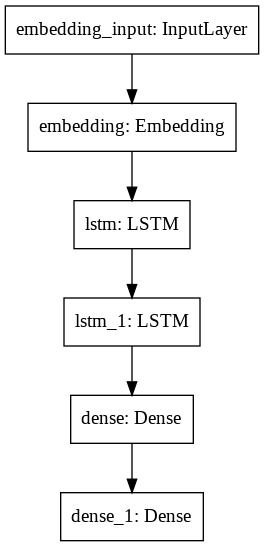

In [26]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file = 'plot.png', show_layer_names = True)

Building our Neural Network model

This includes training our model.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# modelcheckpoint is used to save our model and weights at some interval.

checkpoint_path = F"/content/drive/My Drive/Neural_Network/next_word.h5"

# passing file path to save our model. we will monitor total loss valu.
checkpoint = ModelCheckpoint(checkpoint_path, monitor = 'loss', verbose = 1, save_best_only = True)

# compiling our model by passing the loss and optimizer function.
# categorical_crossentropy is used to multi-class classification (several possible outputs and the model has to choose one).
# Adam optimizer is passed to update the weights iteratively based on training data.
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001))

# Fitting the model by passing the independent and dependent variables.
# Epochs is the number of iterations to be performed.
# batch_size is the number of training samples in one forward or backward pass. Higher batch size require more memory space.
model.fit(x, y, epochs = 70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1739/1739 [==============================] - 49s 24ms/step - loss: 6.4486

Epoch 00001: loss improved from inf to 6.44862, saving model to /content/drive/My Drive/Neural_Network/next_word.h5
Epoch 2/70
1739/1739 [==============================] - 42s 24ms/step - loss: 5.8219

Epoch 00002: loss improved from 6.44862 to 5.82192, saving model to /content/drive/My Drive/Neural_Network/next_word.h5
Epoch 3/70
1739/1739 [==============================] - 42s 24ms/step - loss: 5.4538

Epoch 00003: loss improved from 5.82192 to 5.45379, saving model to /content/drive/My Drive/Neural_Network/next_word.h5
Epoch 4/70
1739/1739 [==============================] - 42s 24ms/step - loss: 5.1772

Epoch 00004: loss improved from 5.45379 to 5.17717, saving model to /content/drive/My Drive/Neural_Network/next_word.h5
Epoch 5/70
1739/1739 [==============================] - 42s 24ms/step - loss: 4.9263

Epoch 00005: loss improved from 5.17717 to 4.92633, saving model to /content/drive/My Drive/Ne

In [27]:
checkpoint_path = F"/content/drive/My Drive/Neural_Network/next_word.h5"

Prediction from our Neural Network

In [28]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Loading the model file.
model = load_model(checkpoint_path) 

# Loading the tokenizer file.
tokenizer = pickle.load(open(F"/content/drive/My Drive/Neural_Network/token.pkl", 'rb'))


In [29]:
def predict_next_word(model, tokenizer, text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  predt = np.argmax(model.predict(sequence))
  predicted_word = ''

  for key, value in tokenizer.word_index.items():
    if value ==predt:
      predicted_word = key
      break
  
  print('Prediction of the model =======>  ', predicted_word)
  return predicted_word



Taking input from the user.

In [33]:
while(True):
  text = input('Enter the text : ')

  if text == '0':
    print('Execution completed!')
    break
  else:
    try:
      text = text.split(' ')
      text = text[-4:]
      print(text)

      predict_next_word(model, tokenizer, text)
    except Exception as e:
      print('Error occured : ', e)
      continue

Enter the text : But for the trained reasoner to admit such intrusions into his own
['intrusions', 'into', 'his', 'own']
Prediction of the model =======>   delicate
Enter the text : were sufficient to absorb all my
['to', 'absorb', 'all', 'my']
Prediction of the model =======>   attention
Enter the text : faculties and extraordinary powers of
['and', 'extraordinary', 'powers', 'of']
Prediction of the model =======>   observation
Enter the text : By the way, since you are interested in these little
['interested', 'in', 'these', 'little']
Prediction of the model =======>   problems
Enter the text : 0
Execution completed!
